# Problema de regresión lineal para obtener los grados Fahrenheit (y) en función de los Celsius (x)

## Entendimiento del problema

Queremos obtener una primera red neuronal de una neurona con función de activación lineal para que aprenda la siguiente función:

$$ f = c \times 1.8 + 32 $$

Aunque sabemos como se convierte queremos que la red lo aprenda sola a partir de solo unas observaciones

## Creación conjunto datos

In [1]:
# Preparación del entorno
%reset -f
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# versión de tensorflow
tf.__version__

'2.14.0'

In [2]:
# Datos a aprender
X_train = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
Y_train = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [3]:
ds_tr_XY = pd.DataFrame({"c":X_train, "f":Y_train})
ds_tr_XY

,c,f
0,-40.0,-40.0
1,-10.0,14.0
2,0.0,32.0
3,8.0,46.0
4,15.0,59.0
5,22.0,72.0
6,38.0,100.0


## Entendimiento datos

In [4]:
# Visualización de los datos

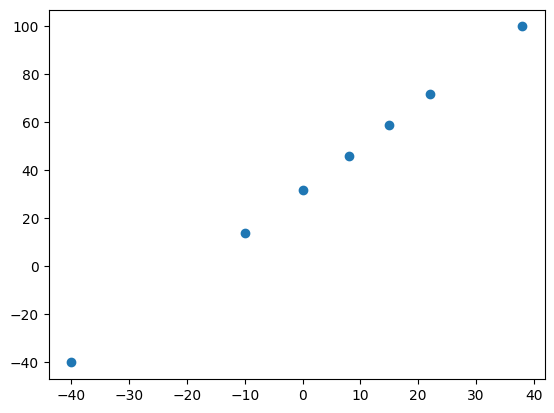

In [5]:
plt.plot(X_train,Y_train, "o")

## Selección modelo
Una red neuronal con 1 entrada (c) y función de activación lineal:

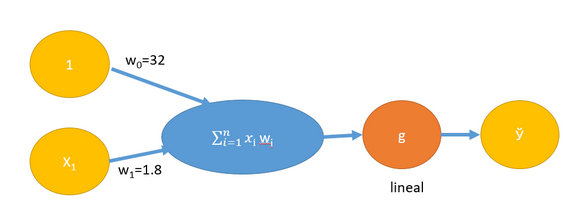

In [6]:
###############################################
# MLP con 1 capa
###############################################

# La definición del modelo toma una lista de capas como parámetro
# que especifica el orden de cálculo desde la entrada a la salida:
# - input_shape=[1] — Especifica que la entrada a la capa tiene un valor simple (x1)
# - units=1 — Número de neuronas en la capa.

capa = tf.keras.layers.Dense(units=1,input_shape=[1])
model = tf.keras.Sequential([capa])


## Construcción modelo

In [7]:
# Se compila el modelo con dos parámetros:
# - Loss function — Una forma de medir lo lejos que están las predicciones del resultado deseado.
#                 (La diferencia se llama pérdida o "loss".)
# - Optimizer function — Una forma de ajustar los valores internos para reducir la pérdida con tasa aprendizaje

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

In [8]:
# resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Se entrena el modelo
historial = model.fit(x=X_train, y=Y_train, epochs=1000, verbose=False)
print("modelo entrenado")

modelo entrenado


In [10]:
# Parámetros de history
historial.params

{'verbose': False, 'epochs': 1000, 'steps': 1}

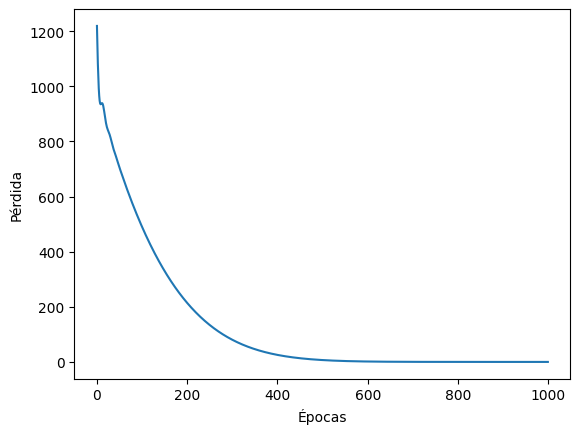

In [11]:
# Se visualiza la evolución de loss
plt.xlabel('Épocas')
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])
plt.show()

## Interpretación conocimiento obtenido

In [12]:
# Pesos de las capas
ecuacion = capa.get_weights()
print(ecuacion)
print("y = " + str(float(ecuacion[0][0])) + " * x + " + (str(float(ecuacion[1][0]))))

[array([[1.7981341]], dtype=float32), array([31.930626], dtype=float32)]
y = 1.7981340885162354 * x + 31.930625915527344


C:\Users\usuario\AppData\Local\Temp\ipykernel_3296\3361374570.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y = " + str(float(ecuacion[0][0])) + " * x + " + (str(float(ecuacion[1][0]))))


## Aplicación conocimiento descubierto

In [13]:
# Usamos el modelo para predecir nuevos casos
X_ap = np.array([7, 10, 25, 40])
Y_ap = model.predict(X_ap)
XY_ap = pd.DataFrame({"c":X_ap, "f_pred":Y_ap.ravel()})
XY_ap

1/1 [==============================] - 0s 143ms/step


,c,f_pred
0,7,44.517563
1,10,49.911964
2,25,76.883980
3,40,103.855988
